Fraud detection in credict card using DNNs

1. downloading the dataset from kaggle

In [25]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

2. analysing the dataframe

In [28]:
df.head() #31 columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df.isnull().sum() #no null columns

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [30]:
df.dtypes #no data type issues since everything is in float64 or int

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [31]:
df.duplicated().sum() #1081 duplicates

np.int64(1081)

In [32]:
df.drop_duplicates(inplace=True)
df.duplicated().sum() #dropping duplicates

np.int64(0)

In [33]:
df['Class'].unique() #target column 0 for no fraud and 1 for fraud

array([0, 1])

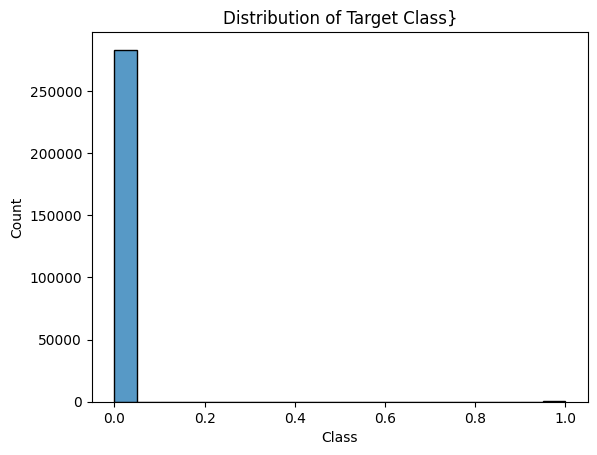

,proportion
Class,
0,99.83329
1,0.16671


In [10]:
#highly imbalance in target column
sns.histplot(df['Class'])
plt.title('Distribution of Target Class}')
plt.show()
print()
class_counts = df['Class'].value_counts(normalize=True) * 100
class_counts #99.82 percent of non fraud

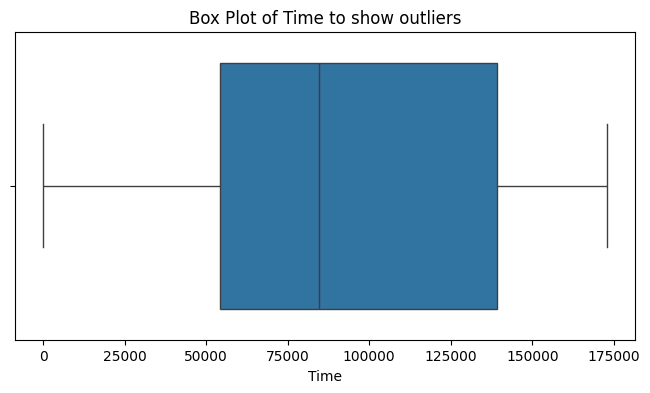

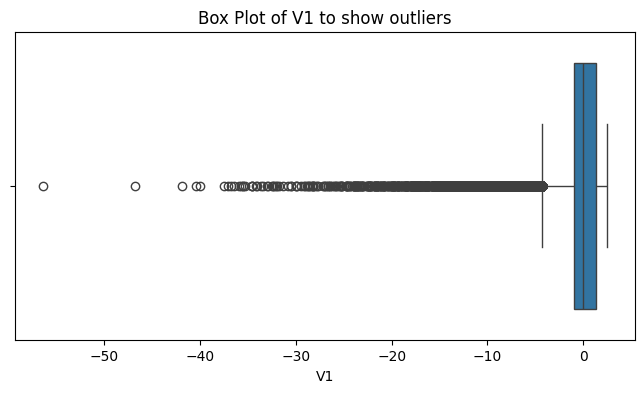

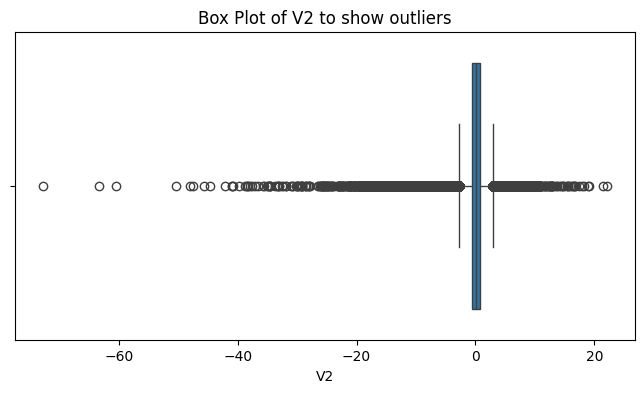

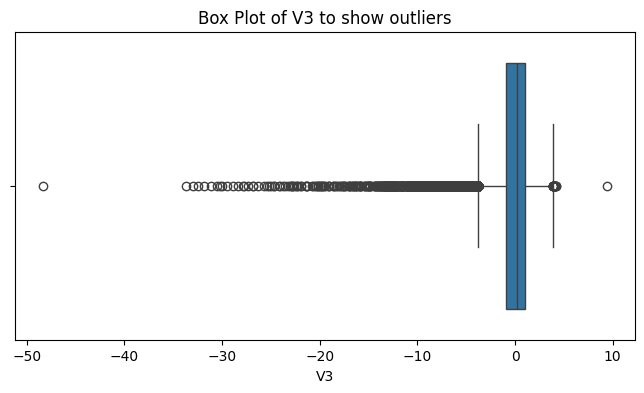

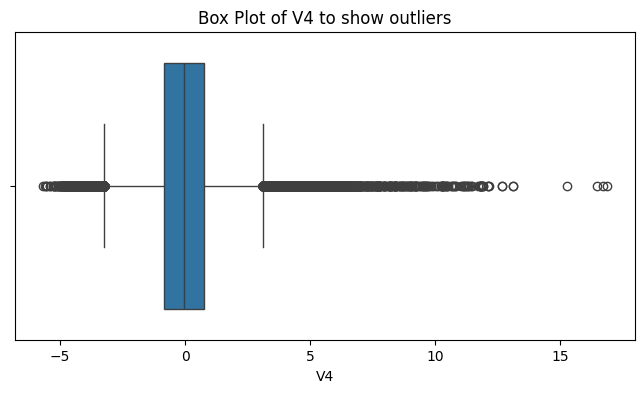

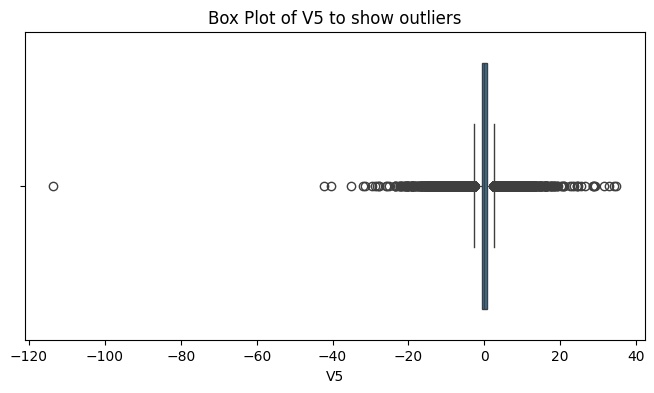

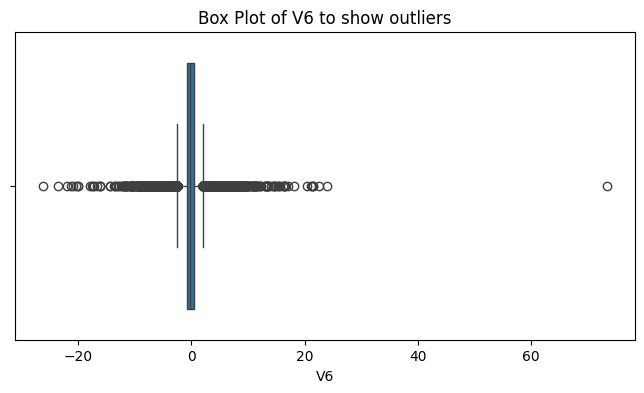

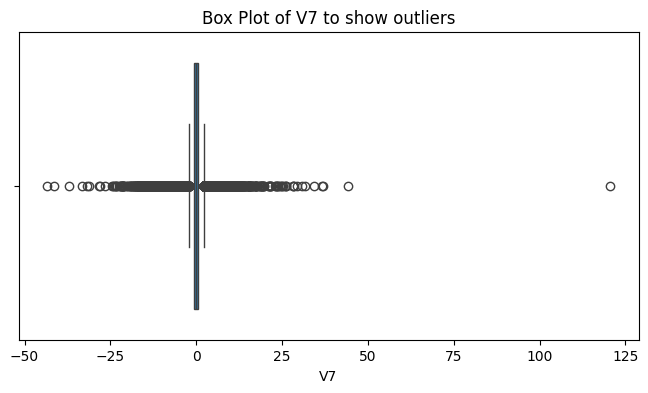

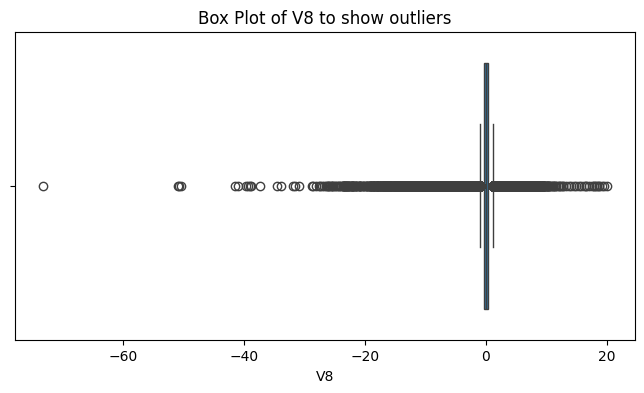

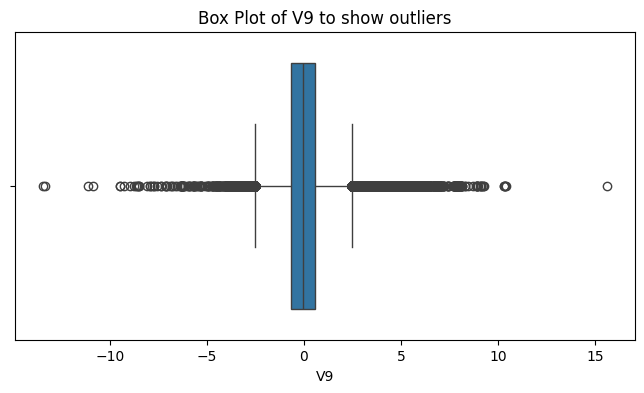

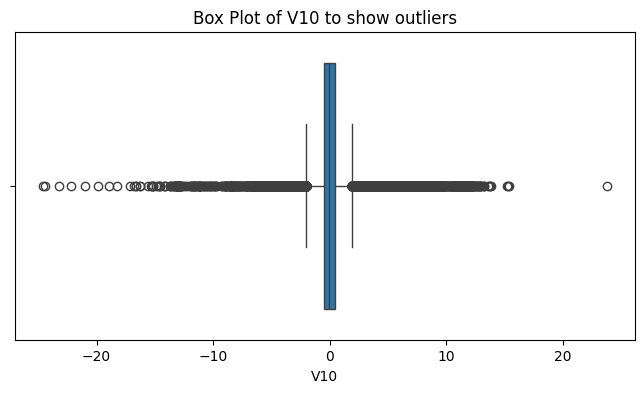

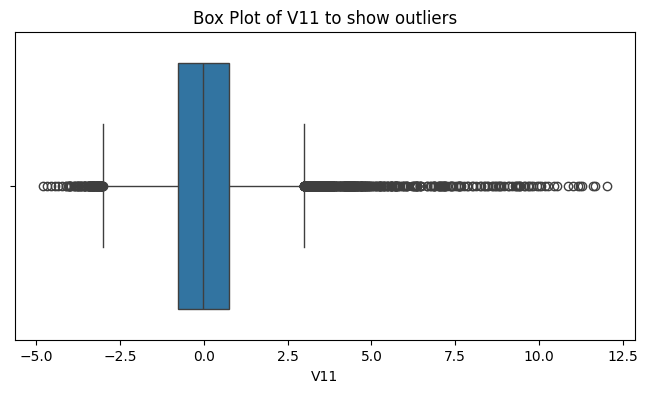

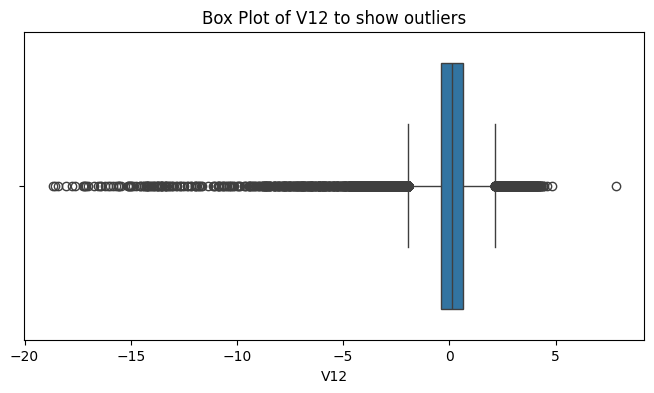

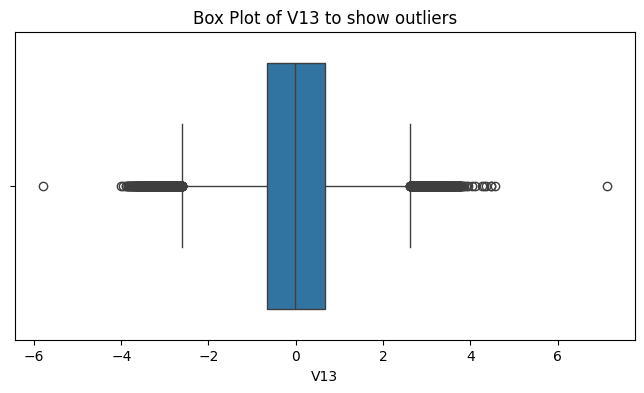

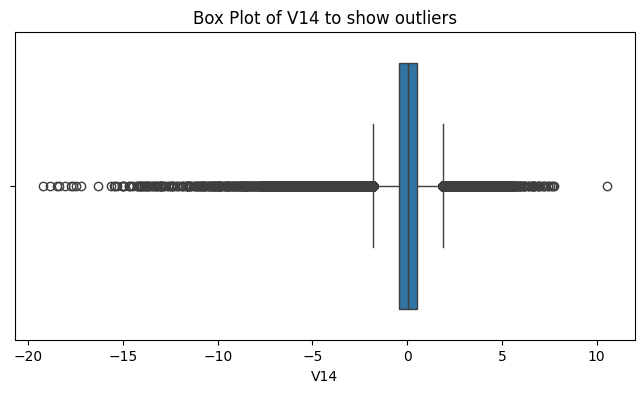

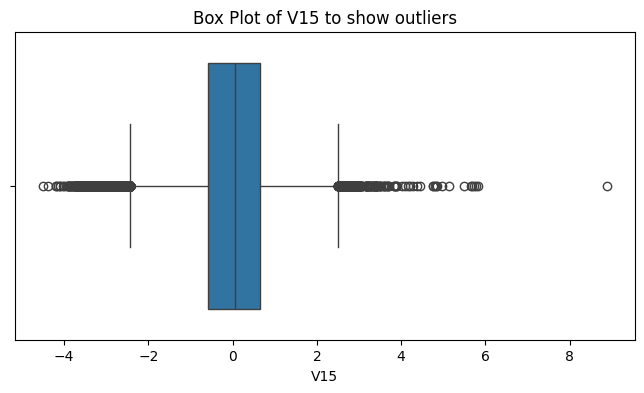

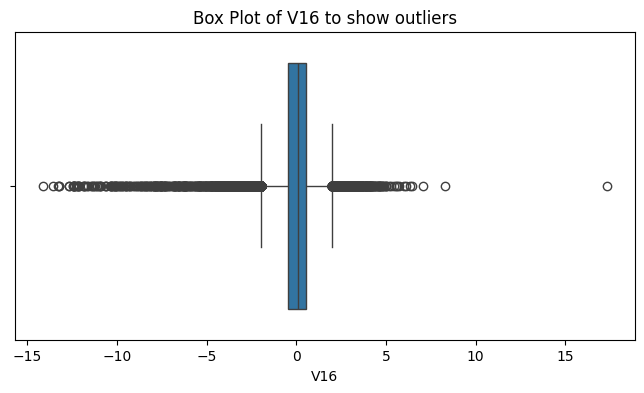

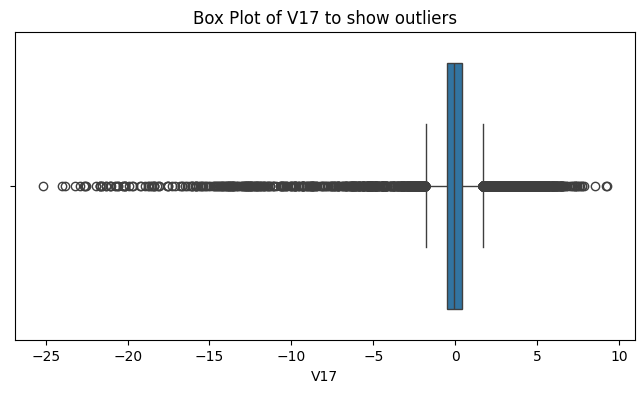

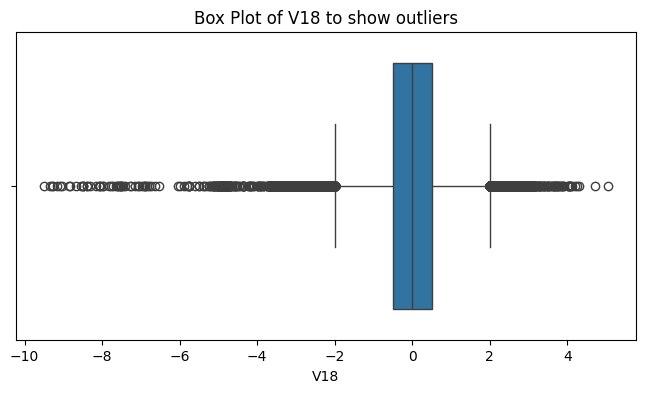

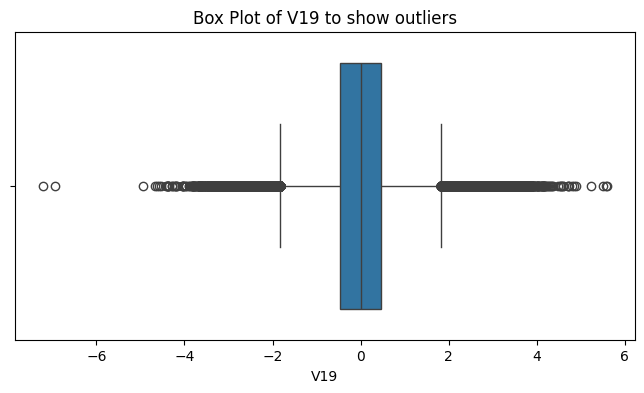

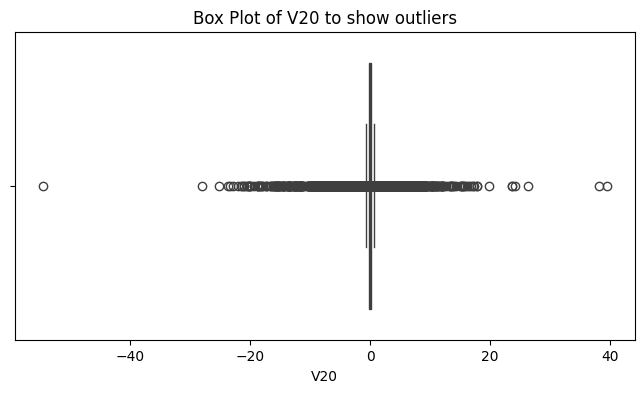

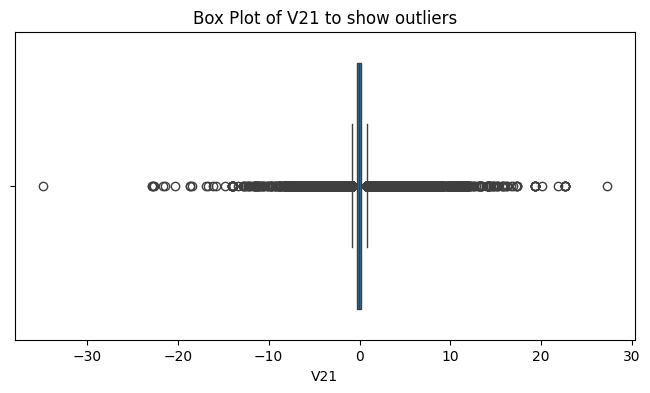

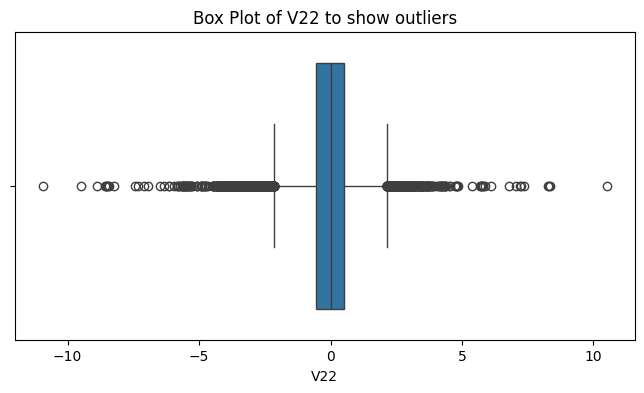

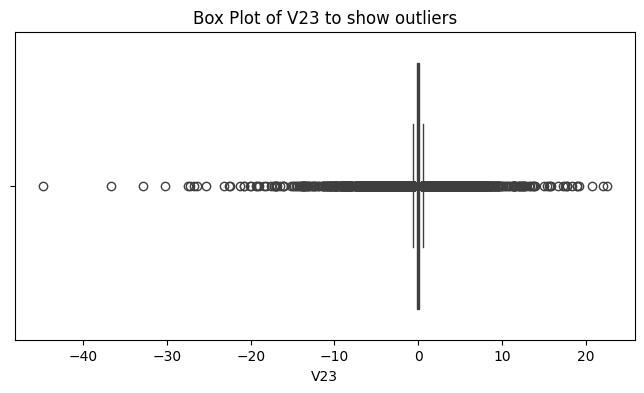

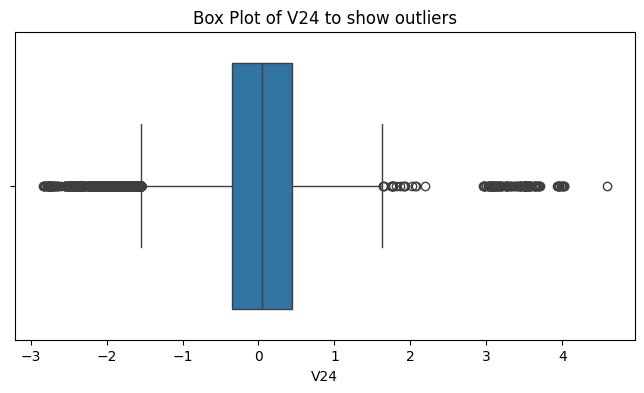

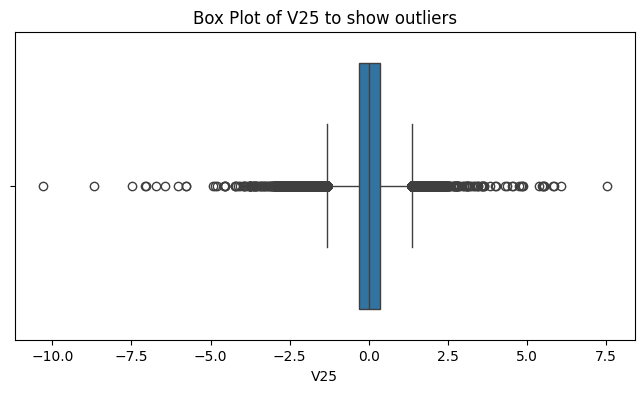

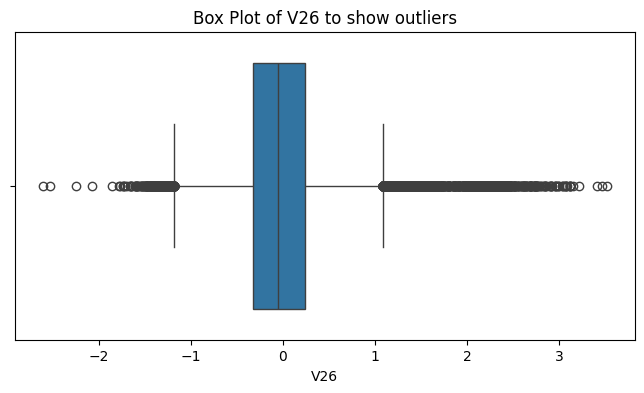

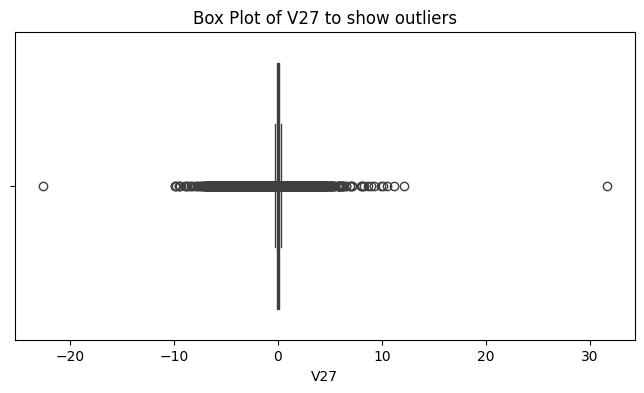

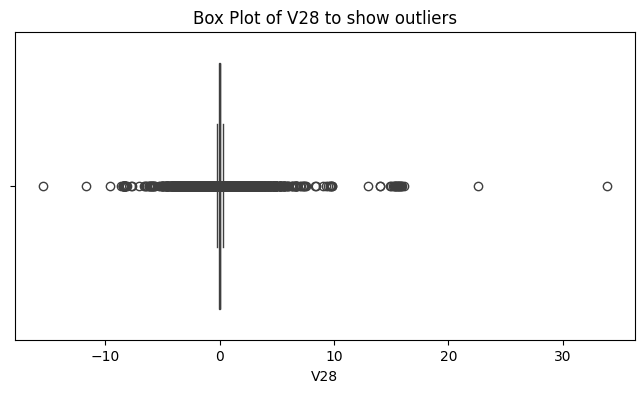

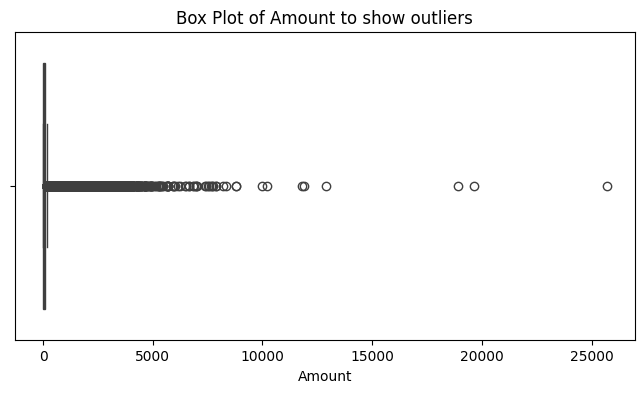

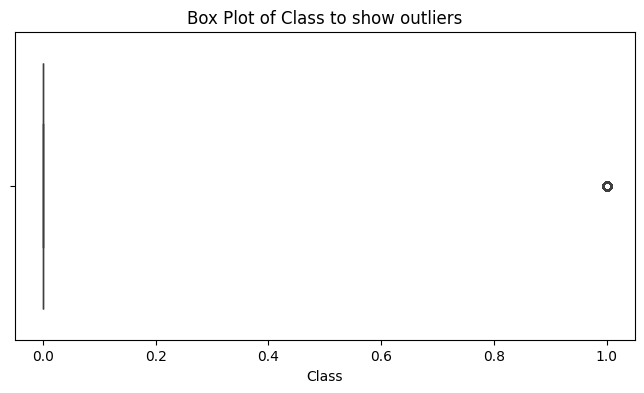

In [11]:
#we can have too many outliers due to very precised values in the columns of df
for c in df.columns:
  plt.figure(figsize=(8,4))
  sns.boxplot(x=df[c])
  plt.title(f'Box Plot of {c} to show outliers')
  plt.show()
  print()

In [34]:
#time and amount columns need scaling
#other columns are principal component analysis transformes ie mean to 0and std to 1 almost
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


3. Limited preprocessing

In [35]:
from sklearn.preprocessing import StandardScaler
#scaling the amount and time columns
#using sequence since credit card fraudscould depend on order of features

def scale_features(df):
  scaler_amount = StandardScaler()
  scaler_time = StandardScaler()
  df['Amount'] = scaler_amount.fit_transform(df['Amount'].values.reshape(-1, 1))
  df['Time'] = scaler_time.fit_transform(df['Time'].values.reshape(-1, 1))
  return df, scaler_amount, scaler_time

def sliding_sequences(df,length=10, step=1):
  features = [col for col in df.columns if col != 'Class']
  data = df[features].values
  labels = df['Class'].values
  sequences = []
  seq_labels = []
  for start in range(0, len(df)-length+1, step):
    seq = data[start:start+length]
    label = labels[start+length-1]
    sequences.append(seq)
    seq_labels.append(label)
  return np.array(sequences), np.array(seq_labels).reshape(-1, 1)

In [36]:
#train test split and oversampling for imbalence data
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df, scaler_amount, scaler_time = scale_features(df)
train_df, test_df = train_test_split(df, test_size=0.2,stratify=df['Class'], random_state=42)
seq_len = 10
X_train_seq, y_train_seq = sliding_sequences(train_df,length=seq_len)
X_test_seq, y_test_seq = sliding_sequences(test_df,length=seq_len)

#SMOTE
n_samples, seq_len, n_features = X_train_seq.shape
X_train_flat = X_train_seq.reshape(n_samples, seq_len*n_features)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_flat, y_train_seq.ravel())

X_train_resampled = X_train_resampled.reshape(-1, seq_len, n_features)
y_train_resampled = y_train_resampled.reshape(-1, 1)

print("Train sequences shape after SMOTE:", X_train_resampled.shape)
print("Train labels shape after SMOTE:", y_train_resampled.shape)
print("Test sequences shape:", X_test_seq.shape)
print("Test labels shape:", y_test_seq.shape)

Train sequences shape after SMOTE: (453186, 10, 30)
Train labels shape after SMOTE: (453186, 1)
Test sequences shape: (56737, 10, 30)
Test labels shape: (56737, 1)


4. Prequisite Functions

In [38]:
#activation function
def sigmoid(x): return 1 / (1 + np.exp(-x))
def dsigmoid(y): return y * (1 - y)
def tanh(x): return np.tanh(x)
def dtanh(y): return 1 - y ** 2

In [39]:
#LSTM cell
class LSTMCell:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        # Xavier init#
        self.W = np.random.randn(input_dim, 4 * hidden_dim) * np.sqrt(1 / input_dim)
        self.U = np.random.randn(hidden_dim, 4 * hidden_dim) * np.sqrt(1 / hidden_dim)
        self.b = np.zeros((1, 4 * hidden_dim))
        # Adam params
        self.mW = np.zeros_like(self.W); self.vW = np.zeros_like(self.W)
        self.mU = np.zeros_like(self.U); self.vU = np.zeros_like(self.U)
        self.mb = np.zeros_like(self.b); self.vb = np.zeros_like(self.b)
        self.t = 0

    def zero_grad(self):
        self.dW = np.zeros_like(self.W)
        self.dU = np.zeros_like(self.U)
        self.db = np.zeros_like(self.b)

    def forward(self, x_seq):
        batch, seq_len, _ = x_seq.shape
        h = np.zeros((batch, self.hidden_dim))
        c = np.zeros((batch, self.hidden_dim))
        self.cache = []
        for t in range(seq_len):
            x_t = x_seq[:, t, :]
            z = np.dot(x_t, self.W) + np.dot(h, self.U) + self.b
            i = sigmoid(z[:, :self.hidden_dim])
            f = sigmoid(z[:, self.hidden_dim:2*self.hidden_dim])
            o = sigmoid(z[:, 2*self.hidden_dim:3*self.hidden_dim])
            g = tanh(z[:, 3*self.hidden_dim:])
            c = f * c + i * g
            h = o * tanh(c)
            self.cache.append((x_t, h, c, i, f, o, g))
        return h  # last hidden state

    def backward(self, dh_last, lr, beta1=0.9, beta2=0.999, eps=1e-8):
        x_t, h, c, i, f, o, g = self.cache[-1]
        do = dh_last * tanh(c)
        dc = dh_last * o * dtanh(tanh(c))
        di = dc * g
        dg = dc * i
        df = dc * c
        dz = np.hstack([di * dsigmoid(i), df * dsigmoid(f), do * dsigmoid(o), dg * dtanh(g)])
        self.dW = np.dot(x_t.T, dz)
        self.dU = np.dot(h.T, dz)
        self.db = np.sum(dz, axis=0, keepdims=True)
        # Adam update
        self.t += 1
        for param, dparam, m, v in [
            (self.W, self.dW, self.mW, self.vW),
            (self.U, self.dU, self.mU, self.vU),
            (self.b, self.db, self.mb, self.vb)
        ]:
            m[:] = beta1 * m + (1 - beta1) * dparam
            v[:] = beta2 * v + (1 - beta2) * (dparam ** 2)
            m_hat = m / (1 - beta1 ** self.t)
            v_hat = v / (1 - beta2 ** self.t)
            param -= lr * m_hat / (np.sqrt(v_hat) + eps)

In [40]:
#Dropout
class Dropout:
    def __init__(self, rate):
        self.rate = rate
        self.mask = None
    def forward(self, X, training=True):
        if training:
            self.mask = (np.random.rand(*X.shape) > self.rate) / (1 - self.rate)
            return X * self.mask
        else:
            return X

In [41]:
#Dense layers
class Dense:
    def __init__(self, input_dim, output_dim, activation=None):
        limit = np.sqrt(6 / (input_dim + output_dim))
        self.W = np.random.uniform(-limit, limit, (input_dim, output_dim))
        self.b = np.zeros((1, output_dim))
        self.activation = activation
        # Adam params
        self.mW = np.zeros_like(self.W); self.vW = np.zeros_like(self.W)
        self.mb = np.zeros_like(self.b); self.vb = np.zeros_like(self.b)
        self.t = 0
    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.W) + self.b
        if self.activation == 'relu':
            self.A = np.maximum(0, self.Z)
        elif self.activation == 'sigmoid':
            self.A = sigmoid(self.Z)
        else:
            self.A = self.Z
        return self.A
    def backward(self, dA, lr, beta1=0.9, beta2=0.999, eps=1e-8):
        if self.activation == 'relu':
            dZ = dA * (self.Z > 0)
        elif self.activation == 'sigmoid':
            sig = sigmoid(self.Z)
            dZ = dA * sig * (1 - sig)
        else:
            dZ = dA
        m = self.X.shape[0]
        dW = np.dot(self.X.T, dZ) / m
        db = np.mean(dZ, axis=0, keepdims=True)
        dX = np.dot(dZ, self.W.T)
        # Adam update
        self.t += 1
        self.mW = beta1 * self.mW + (1 - beta1) * dW
        self.vW = beta2 * self.vW + (1 - beta2) * (dW ** 2)
        mW_hat = self.mW / (1 - beta1 ** self.t)
        vW_hat = self.vW / (1 - beta2 ** self.t)
        self.W -= lr * mW_hat / (np.sqrt(vW_hat) + eps)
        self.mb = beta1 * self.mb + (1 - beta1) * db
        self.vb = beta2 * self.vb + (1 - beta2) * (db ** 2)
        mb_hat = self.mb / (1 - beta1 ** self.t)
        vb_hat = self.vb / (1 - beta2 ** self.t)
        self.b -= lr * mb_hat / (np.sqrt(vb_hat) + eps)
        return dX

In [42]:
#binary cross entropy loss function
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

5. MODEL TRAINING

In [43]:
#model
class RNNModel:
    def __init__(self, input_dim, hidden_dim, dropout_rate=0.3):
        self.lstm = LSTMCell(input_dim, hidden_dim)
        self.dropout = Dropout(dropout_rate)
        self.dense = Dense(hidden_dim, 1, activation='sigmoid')
    def forward(self, X, training=True):
        h = self.lstm.forward(X)
        h = self.dropout.forward(h, training=training)
        out = self.dense.forward(h)
        return out
    def backward(self, X, y, y_pred, lr):
        dA = binary_cross_entropy_derivative(y, y_pred) / y.shape[0]
        dH = self.dense.backward(dA, lr)
        # No dropout backward needed (mask applied in forward)
        self.lstm.backward(dH, lr)

In [44]:
#train
def train(model, X_train, y_train, X_val, y_val, epochs=30, batch_size=128, patience=5, lr=0.001):
    best_val_loss = np.inf
    patience_counter = 0
    for epoch in range(epochs):
        perm = np.random.permutation(X_train.shape[0])
        X_train = X_train[perm]
        y_train = y_train[perm]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            y_pred = model.forward(X_batch, training=True)
            model.backward(X_batch, y_batch, y_pred, lr)
        # Validation
        y_val_pred = model.forward(X_val, training=False)
        val_loss = binary_cross_entropy(y_val, y_val_pred)
        print(f"Epoch {epoch+1}/{epochs} - val_loss: {val_loss:.6f}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # save weights (not implemented for brevity)
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

6. TRAINING, TESTING AND EVALUATION

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
#validation split
val_size = int(0.2 * X_train_seq.shape[0])
X_train, X_val = X_train_seq[:-val_size], X_train_seq[-val_size:]
y_train, y_val = y_train_seq[:-val_size], y_train_seq[-val_size:]

#trainig
input_dim = X_train.shape[2]
hidden_dim = 64
model = RNNModel(input_dim, hidden_dim, dropout_rate=0.3)
train(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=128, patience=5, lr=0.001)

#testing
y_pred_prob = model.forward(X_test_seq, training=False).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

#evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test_seq, y_pred))
print("Classification Report:\n", classification_report(y_test_seq, y_pred))
print("AUC Score:", roc_auc_score(y_test_seq, y_pred_prob))

Epoch 1/50 - val_loss: 0.003291
Epoch 2/50 - val_loss: 0.002923
Epoch 3/50 - val_loss: 0.002840
Epoch 4/50 - val_loss: 0.002903
Epoch 5/50 - val_loss: 0.003029
Epoch 6/50 - val_loss: 0.002935
Epoch 7/50 - val_loss: 0.002929
Epoch 8/50 - val_loss: 0.002763
Epoch 9/50 - val_loss: 0.002757
Epoch 10/50 - val_loss: 0.002683
Epoch 11/50 - val_loss: 0.002780
Epoch 12/50 - val_loss: 0.002734
Epoch 13/50 - val_loss: 0.002724
Epoch 14/50 - val_loss: 0.002808
Epoch 15/50 - val_loss: 0.002743
Early stopping at epoch 15
Confusion Matrix:
 [[56630    12]
 [   25    70]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56642
           1       0.85      0.74      0.79        95

    accuracy                           1.00     56737
   macro avg       0.93      0.87      0.90     56737
weighted avg       1.00      1.00      1.00     56737

AUC Score: 0.9708719027539542


In [37]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# --- Activation functions ---
def sigmoid(x): return 1 / (1 + np.exp(-x))
def dsigmoid(y): return y * (1 - y)
def tanh(x): return np.tanh(x)
def dtanh(y): return 1 - y ** 2

# --- LSTM Cell ---
class LSTMCell:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        # Xavier init#
        self.W = np.random.randn(input_dim, 4 * hidden_dim) * np.sqrt(1 / input_dim)
        self.U = np.random.randn(hidden_dim, 4 * hidden_dim) * np.sqrt(1 / hidden_dim)
        self.b = np.zeros((1, 4 * hidden_dim))
        # Adam params
        self.mW = np.zeros_like(self.W); self.vW = np.zeros_like(self.W)
        self.mU = np.zeros_like(self.U); self.vU = np.zeros_like(self.U)
        self.mb = np.zeros_like(self.b); self.vb = np.zeros_like(self.b)
        self.t = 0

    def zero_grad(self):
        self.dW = np.zeros_like(self.W)
        self.dU = np.zeros_like(self.U)
        self.db = np.zeros_like(self.b)

    def forward(self, x_seq):
        batch, seq_len, _ = x_seq.shape
        h = np.zeros((batch, self.hidden_dim))
        c = np.zeros((batch, self.hidden_dim))
        self.cache = []
        for t in range(seq_len):
            x_t = x_seq[:, t, :]
            z = np.dot(x_t, self.W) + np.dot(h, self.U) + self.b
            i = sigmoid(z[:, :self.hidden_dim])
            f = sigmoid(z[:, self.hidden_dim:2*self.hidden_dim])
            o = sigmoid(z[:, 2*self.hidden_dim:3*self.hidden_dim])
            g = tanh(z[:, 3*self.hidden_dim:])
            c = f * c + i * g
            h = o * tanh(c)
            self.cache.append((x_t, h, c, i, f, o, g))
        return h  # last hidden state

    def backward(self, dh_last, lr, beta1=0.9, beta2=0.999, eps=1e-8):
        # Only backward for last time step for simplicity (can extend to BPTT)
        x_t, h, c, i, f, o, g = self.cache[-1]
        do = dh_last * tanh(c)
        dc = dh_last * o * dtanh(tanh(c))
        di = dc * g
        dg = dc * i
        df = dc * c  # previous c, but for simplicity using current c
        dz = np.hstack([di * dsigmoid(i), df * dsigmoid(f), do * dsigmoid(o), dg * dtanh(g)])
        self.dW = np.dot(x_t.T, dz)
        self.dU = np.dot(h.T, dz)
        self.db = np.sum(dz, axis=0, keepdims=True)
        # Adam update
        self.t += 1
        for param, dparam, m, v in [
            (self.W, self.dW, self.mW, self.vW),
            (self.U, self.dU, self.mU, self.vU),
            (self.b, self.db, self.mb, self.vb)
        ]:
            m[:] = beta1 * m + (1 - beta1) * dparam
            v[:] = beta2 * v + (1 - beta2) * (dparam ** 2)
            m_hat = m / (1 - beta1 ** self.t)
            v_hat = v / (1 - beta2 ** self.t)
            param -= lr * m_hat / (np.sqrt(v_hat) + eps)

# --- Dropout ---
class Dropout:
    def __init__(self, rate):
        self.rate = rate
        self.mask = None
    def forward(self, X, training=True):
        if training:
            self.mask = (np.random.rand(*X.shape) > self.rate) / (1 - self.rate)
            return X * self.mask
        else:
            return X

# --- Dense Layer ---
class Dense:
    def __init__(self, input_dim, output_dim, activation=None):
        limit = np.sqrt(6 / (input_dim + output_dim))
        self.W = np.random.uniform(-limit, limit, (input_dim, output_dim))
        self.b = np.zeros((1, output_dim))
        self.activation = activation
        # Adam params
        self.mW = np.zeros_like(self.W); self.vW = np.zeros_like(self.W)
        self.mb = np.zeros_like(self.b); self.vb = np.zeros_like(self.b)
        self.t = 0
    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.W) + self.b
        if self.activation == 'relu':
            self.A = np.maximum(0, self.Z)
        elif self.activation == 'sigmoid':
            self.A = sigmoid(self.Z)
        else:
            self.A = self.Z
        return self.A
    def backward(self, dA, lr, beta1=0.9, beta2=0.999, eps=1e-8):
        if self.activation == 'relu':
            dZ = dA * (self.Z > 0)
        elif self.activation == 'sigmoid':
            sig = sigmoid(self.Z)
            dZ = dA * sig * (1 - sig)
        else:
            dZ = dA
        m = self.X.shape[0]
        dW = np.dot(self.X.T, dZ) / m
        db = np.mean(dZ, axis=0, keepdims=True)
        dX = np.dot(dZ, self.W.T)
        # Adam update
        self.t += 1
        self.mW = beta1 * self.mW + (1 - beta1) * dW
        self.vW = beta2 * self.vW + (1 - beta2) * (dW ** 2)
        mW_hat = self.mW / (1 - beta1 ** self.t)
        vW_hat = self.vW / (1 - beta2 ** self.t)
        self.W -= lr * mW_hat / (np.sqrt(vW_hat) + eps)
        self.mb = beta1 * self.mb + (1 - beta1) * db
        self.vb = beta2 * self.vb + (1 - beta2) * (db ** 2)
        mb_hat = self.mb / (1 - beta1 ** self.t)
        vb_hat = self.vb / (1 - beta2 ** self.t)
        self.b -= lr * mb_hat / (np.sqrt(vb_hat) + eps)
        return dX

# --- Binary cross entropy loss ---
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

# --- Model ---
class RNNModel:
    def __init__(self, input_dim, hidden_dim, dropout_rate=0.3):
        self.lstm = LSTMCell(input_dim, hidden_dim)
        self.dropout = Dropout(dropout_rate)
        self.dense = Dense(hidden_dim, 1, activation='sigmoid')
    def forward(self, X, training=True):
        h = self.lstm.forward(X)
        h = self.dropout.forward(h, training=training)
        out = self.dense.forward(h)
        return out
    def backward(self, X, y, y_pred, lr):
        dA = binary_cross_entropy_derivative(y, y_pred) / y.shape[0]
        dH = self.dense.backward(dA, lr)
        # No dropout backward needed (mask applied in forward)
        self.lstm.backward(dH, lr)

# --- Training ---
def train(model, X_train, y_train, X_val, y_val, epochs=30, batch_size=128, patience=5, lr=0.001):
    best_val_loss = np.inf
    patience_counter = 0
    for epoch in range(epochs):
        perm = np.random.permutation(X_train.shape[0])
        X_train = X_train[perm]
        y_train = y_train[perm]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            y_pred = model.forward(X_batch, training=True)
            model.backward(X_batch, y_batch, y_pred, lr)
        # Validation
        y_val_pred = model.forward(X_val, training=False)
        val_loss = binary_cross_entropy(y_val, y_val_pred)
        print(f"Epoch {epoch+1}/{epochs} - val_loss: {val_loss:.6f}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # save weights (not implemented for brevity)
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

# --- Data Preparation ---
# Assume you have created sequences: X_train_seq, y_train_seq, X_test_seq, y_test_seq
# X shape: (samples, seq_len, features)

# Split train/val
val_size = int(0.2 * X_train_seq.shape[0])
X_train, X_val = X_train_seq[:-val_size], X_train_seq[-val_size:]
y_train, y_val = y_train_seq[:-val_size], y_train_seq[-val_size:]

#training
input_dim = X_train.shape[2]
hidden_dim = 64
model = RNNModel(input_dim, hidden_dim, dropout_rate=0.3)
train(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=128, patience=5, lr=0.001)

#testing
y_pred_prob = model.forward(X_test_seq, training=False).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

#evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test_seq, y_pred))
print("Classification Report:\n", classification_report(y_test_seq, y_pred))
print("AUC Score:", roc_auc_score(y_test_seq, y_pred_prob))


Epoch 1/50 - val_loss: 0.003282
Epoch 2/50 - val_loss: 0.002807
Epoch 3/50 - val_loss: 0.002780
Epoch 4/50 - val_loss: 0.002846
Epoch 5/50 - val_loss: 0.003195
Epoch 6/50 - val_loss: 0.003052
Epoch 7/50 - val_loss: 0.002758
Epoch 8/50 - val_loss: 0.002750
Epoch 9/50 - val_loss: 0.003088
Epoch 10/50 - val_loss: 0.002792
Epoch 11/50 - val_loss: 0.002857
Epoch 12/50 - val_loss: 0.002845
Epoch 13/50 - val_loss: 0.002775
Early stopping at epoch 13
Confusion Matrix:
 [[56631    11]
 [   25    70]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56642
           1       0.86      0.74      0.80        95

    accuracy                           1.00     56737
   macro avg       0.93      0.87      0.90     56737
weighted avg       1.00      1.00      1.00     56737

AUC Score: 0.9731681344882633
